In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = (10,2)
plt.rcParams['font.size'] = 13
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
from scipy.linalg import solve
from periodicity import *
import os

In [2]:
fig_path = 'fig'
if not os.path.exists(fig_path):
    os.makedirs(fig_path,exist_ok=True)

In [3]:
def major_minor_MFG(R, q0, q, T, h, phi0, a0, phi, a, lamb0, lamb):
    N = int(T/h)
    t_list = np.linspace(0, T, N+1)
    
    z0, zT  = q0, 0
    w0, wT = q, 0
    
    A = np.zeros((2*(N-1),2*(N-1)))
    for i in range(N-1):
        A[i,i] = - 2 * a0 / (h * h) - phi0
        A[i,i+(N-1)] = - lamb / (2 * h)
        A[i+(N-1),i] = - lamb0 / (2 * h)
        A[i+(N-1),i+(N-1)] = -2 * a / (h * h) - phi - lamb / (2 * h)
        if i > 0:
            A[i,i-1] = a0 / (h * h)
            A[i+(N-1),i+(N-1)-1] = a / (h * h)
        if i < N - 2:
            A[i,i+1] = a0 / (h * h)
            A[i,i+(N-1)+1] = lamb / (2 * h)
            A[i+(N-1),i+1] = lamb0 / (2 * h)
            A[i+(N-1),i+(N-1)+1] = a / (h * h) + lamb / (2 * h)
            
    b = np.zeros(2*(N-1))
    for i in range(N-1): 
        b[i] = - phi0 * R(t=t_list[i+1])
    # boundary condition 
    b[0] = b[0] - z0 * a0 / (h * h)
    b[N-2] = b[N-2] - zT * a0 / (h * h) - wT * lamb / (2 * h)
    b[N-1] = b[N-1] - w0 * a / (h * h)
    b[2*(N-1)-1] = b[2*(N-1)-1] - wT * a / (h * h) - zT * lamb0 / (2 * h) - wT * lamb / (2 * h)
    
    y = solve(A,b)
    
    Q0 = np.append(np.insert(y[:N-1],0,z0),zT)
    Q = np.append(np.insert(y[N-1:],0,w0),wT)
    
    return Q0, Q

In [4]:
def major_minor_MFG_decomposition(R, q0, q, T, h, phi0, a0, phi, a, lamb0, lamb):
    N = int(T/h)
    t_list = np.linspace(0, T, N+1)
    
    A = np.zeros((2*(N-1),2*(N-1)))
    for i in range(N-1):
        A[i,i] = - 2 * a0 / (h * h) - phi0
        A[i,i+(N-1)] = - lamb / (2 * h)
        A[i+(N-1),i] = - lamb0 / (2 * h)
        A[i+(N-1),i+(N-1)] = -2 * a / (h * h) - phi - lamb / (2 * h)
        if i > 0:
            A[i,i-1] = a0 / (h * h)
            A[i+(N-1),i+(N-1)-1] = a / (h * h)
        if i < N - 2:
            A[i,i+1] = a0 / (h * h)
            A[i,i+(N-1)+1] = lamb / (2 * h)
            A[i+(N-1),i+1] = lamb0 / (2 * h)
            A[i+(N-1),i+(N-1)+1] = a / (h * h) + lamb / (2 * h)
    
    q0_period = 0.1
    q_period =  0.1
    q0_period_new = q0_period
    q_period_new = q_period
    
    for iteration in range(10):
        q0_period = (q0_period + q0_period_new) / 2
        q_period = (q_period + q_period_new) / 2    
        z0, zT  = q0_period, q0_period
        w0, wT = q_period, q_period

        b = np.zeros(2*(N-1))
        for i in range(N-1):
            b[i] = - phi0 * (R(t=t_list[i+1]) - q0 * (T - t_list[i+1]) / T)

        # boundary condition 
        b[0] = b[0] - z0 * a0 / (h * h)
        b[N-2] = b[N-2] - zT * a0 / (h * h) - wT * lamb / (2 * h)
        b[N-1] = b[N-1] - w0 * a / (h * h)
        b[2*(N-1)-1] = b[2*(N-1)-1] - wT * a / (h * h) - zT * lamb0 / (2 * h) - wT * lamb / (2 * h)

        y = solve(A,b)

        Q0_period = np.append(np.insert(y[:N-1],0,z0),zT)
        Q_period = np.append(np.insert(y[N-1:],0,w0),wT)
        
        q0_period_new = Q0_period[1000]
        q_period_new = Q_period[1000]
    
    
    q0_period = Q0_period[0]
    q_period =  Q_period[0]
    
    z0, zT  = - q0_period, - q0_period
    w0, wT = q - q_period, -q_period
    
    b = np.zeros(2*(N-1))
    for i in range(N-1):
        b[i + (N-1)] =  lamb0 * q0 / (2 * T)
    # boundary condition 
    b[0] = b[0] - z0 * a0 / (h * h)
    b[N-2] = b[N-2] - zT * a0 / (h * h) - wT * lamb / (2 * h)
    b[N-1] = b[N-1] - w0 * a / (h * h)
    b[2*(N-1)-1] = b[2*(N-1)-1] - wT * a / (h * h) - zT * lamb0 / (2 * h) - wT * lamb / (2 * h)

    y = solve(A,b)
    
    Q0_trend = np.append(np.insert(y[:N-1],0,z0),zT)
    Q_trend = np.append(np.insert(y[N-1:],0,w0),wT)
    
    return Q0_period, Q_period, Q0_trend, Q_trend

In [5]:
def cal_major_cost(Q0, Q, v0, v, R, q0, q, T, h, phi0, a0, phi, a, lamb0, lamb):
    N = int(T/h)
    t_list = np.linspace(0, T, N+1)
    R_list = np.array([R(t) for t in t_list])
    mean = - lamb * np.sum((Q0 - R_list)[:-1] * v) * h + a0 * np.sum(v0 * v0) * h
    mean_Q0 = - lamb * np.sum((Q0)[:-1] * v) * h + a0 * np.sum(v0 * v0) * h
    mean_R = - lamb * np.sum((R_list)[:-1] * v) * h
    risk = phi0 * np.sum((Q0 - R_list)[:-1] **2) * h
    total = a0 * np.sum(v0 * np.diff(R_list)) - 0.5 * lamb * np.sum((Q0 - R_list)[:-1] * v) * h
    return mean, mean_Q0, mean_R, risk, total

In [6]:
def cal_minor_cost(Q0, Q, v0, v, q0, q, T, h, phi0, a0, phi, a, lamb0, lamb):
    mean = - np.sum(Q[:-1] * (lamb0 * v0 + lamb * v)) * h + a * np.sum(v * v) * h
    risk = phi * np.sum(Q[:-1] **2) * h
    total = - a * q * v[0] + 0.25 * lamb * q**2 - 0.5 * lamb0 * np.sum(Q[:-1] * v0) * h
    return mean, risk, total

In [7]:
phi0 = 0.1
phi = 0.01
a0 = 1e-3
a = 1e-3
lamb0 = 1e-2
lamb = 5e-3
T = 10
# T = 10
h = 1e-3
q0 = 10
q = 0
N = int(T/h)
t_list = np.linspace(0, T, N+1)

# Cosine trading strategy

In [8]:
b = 1
k = 1

In [9]:
def R_cos(t,b=b, q=q0, T=T, k=k):
    return q * (1 - t/T) + b * np.sin(2 * np.pi * k * t)/ (2 * np.pi * k)

def v_cos(t,b=b, q=q0, T=T, k=k):
    return - q / T + b * np.cos(2 * np.pi * k * t)

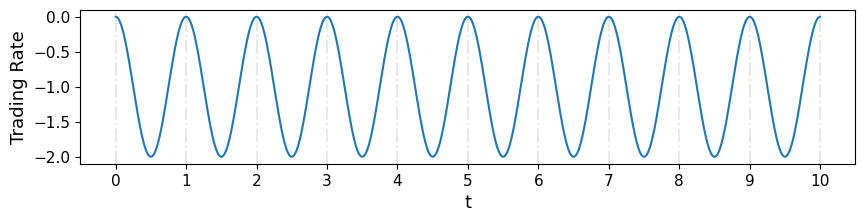

In [10]:
plt.figure(figsize=(10,2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list, [v_cos(t) for t in t_list],color='tab:blue')
# plt.plot(t_list, [v_VWAP_trend(t) for t in t_list],color='tab:blue',linestyle='-.',label='trend of targeting strategy')
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.xticks(np.arange(T+1))
# plt.legend()
plt.savefig(os.path.join(fig_path,'targeting_strategy_cos.jpg'))
plt.show()

In [11]:
Q0, Q = major_minor_MFG(R=R_cos, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

In [ ]:
Q0_nogame, _ = major_minor_MFG(R=R_cos, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=0)
_, Q_nogame = major_minor_MFG(R=R_cos, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=0, lamb=lamb)

In [ ]:
v0 = (Q0[1:]-Q0[:-1])/ h
v0_nogame = (Q0_nogame[1:]-Q0_nogame[:-1])/ h
v = (Q[1:]-Q[:-1])/ h
v_nogame = (Q_nogame[1:]-Q_nogame[:-1])/ h

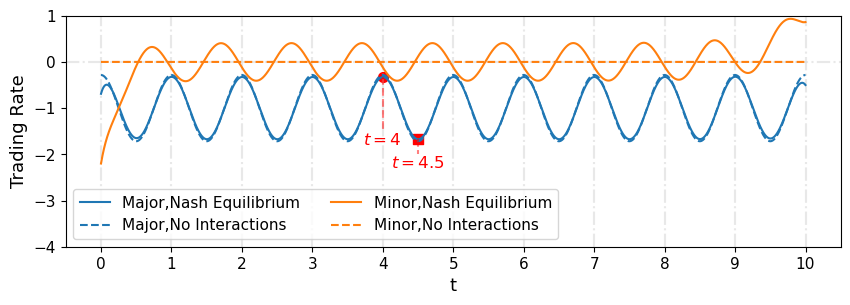

In [ ]:
t_mark_1 = 4 - h
t_mark_2 = 4.5 - h
plt.figure(figsize=(10,3))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1],v0,label='Major,Nash Equilibrium')
plt.plot(t_list[:-1],v0_nogame,color='tab:blue',linestyle='--',label='Major,No Interactions')
plt.plot(t_list[:-1],v,label='Minor,Nash Equilibrium')
plt.plot(t_list[:-1],v_nogame,color='tab:orange',linestyle='--',label='Minor,No Interactions')

plt.scatter([t_mark_1], [v0[int(t_mark_1/h)]], color='red', s=50)
plt.scatter([t_mark_2], [v0[int(t_mark_2/h)]], marker='s', color='red', s=50)
plt.vlines(x=t_mark_1,ymin=v0[int(t_mark_1/h)],ymax=-1.5,color='red',linestyle='--',alpha=0.5)
plt.vlines(x=t_mark_2,ymin=v0[int(t_mark_2/h)],ymax=-2,color='red',linestyle='--',alpha=0.5)
plt.text(4, -1.5, r'$t=4$', fontsize=12, color='red',ha='center',va='top')
plt.text(4.5, -2, r'$t=4.5$', fontsize=12, color='red',ha='center',va='top')

plt.ylim((-4,1))
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.legend(ncol=2)
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_cos.jpg'))
plt.show()

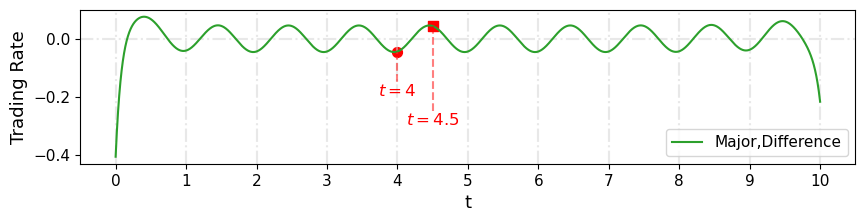

In [ ]:
v0_diff = v0 - v0_nogame
fig, ax1 = plt.subplots(figsize=(10, 2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
ax1.plot(t_list[:-1], v0_diff, label='Major,Difference',color='tab:green')
plt.scatter([t_mark_1], [v0_diff[int(t_mark_1/h)]], color='red', s=50)
plt.scatter([t_mark_2], [v0_diff[int(t_mark_2/h)]], marker='s', color='red', s=50)
plt.vlines(x=t_mark_1,ymin=v0_diff[int(t_mark_1/h)],ymax=-0.15,color='red',linestyle='--',alpha=0.5)
plt.vlines(x=t_mark_2,ymin=v0_diff[int(t_mark_2/h)],ymax=-0.25,color='red',linestyle='--',alpha=0.5)
plt.text(4, -0.15, r'$t=4$', fontsize=12, color='red',ha='center',va='top')
plt.text(4.5, -0.25, r'$t=4.5$', fontsize=12, color='red',ha='center',va='top')

ax1.set_xlabel('t')
ax1.set_ylabel('Trading Rate')
# ax2 = ax1.twinx()
# ax2.plot(t_list[:-1], v - v_nogame, label='Minor',color='tab:orange')
# ax2.set_ylabel('Trading Rate Minor')  # we already handled the x-label with ax1
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, )
plt.legend()
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_diff_cos.jpg'))
plt.show()

In [ ]:
major_cost_mean, major_cost_mean_Q0, major_cost_mean_R, major_cost_risk, major_cost_total = \
                    cal_major_cost(Q0=Q0, Q=Q, v0=v0, v=v, 
                    R=R_cos, q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

major_cost_mean_nogame, major_cost_mean_Q0_nogame, major_cost_mean_R_nogame, major_cost_risk_nogame, major_cost_total_nogame = \
                    cal_major_cost(Q0=Q0_nogame, Q=Q_nogame, v0=v0_nogame, v=v_nogame, 
                    R=R_cos, q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

minor_cost_mean,  minor_cost_risk, minor_cost_total = \
                    cal_minor_cost(Q0=Q0, Q=Q, v0=v0, v=v, 
                    q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

minor_cost_mean_nogame, minor_cost_risk_nogame, minor_cost_total_nogame = \
                    cal_minor_cost(Q0=Q0_nogame, Q=Q_nogame, v0=v0_nogame, v=v_nogame, 
                    q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

cost_analysis_cos = pd.DataFrame(
    {'major': [major_cost_mean, major_cost_mean_Q0, major_cost_mean_R, major_cost_risk, major_cost_total],
    'major_nogame': [major_cost_mean_nogame, major_cost_mean_Q0_nogame, major_cost_mean_R_nogame, major_cost_risk_nogame, major_cost_total_nogame],
    'minor': [minor_cost_mean, minor_cost_mean, 0, minor_cost_risk, minor_cost_total],
    'minor_nogame': [minor_cost_mean_nogame,minor_cost_mean_nogame, 0, minor_cost_risk_nogame, minor_cost_total_nogame]})
cost_analysis_cos.index = ['mean','mean_Q', 'mean_R','risk','total']
cost_analysis_cos.to_csv('cost_analysis_cos.csv')
cost_analysis_cos.round(5)

,major,major_nogame,minor,minor_nogame
mean,0.01157,0.01257,-0.04750,0.0
mean_Q,0.03685,0.01257,-0.04750,0.0
mean_R,0.02528,-0.00000,0.00000,0.0
risk,0.00143,0.00101,0.02287,0.0
total,0.01300,0.01358,-0.02463,0.0


In [ ]:
Q0_period, Q_period, Q0_trend, Q_trend = \
        major_minor_MFG_decomposition(R=R_cos, q0=q0, q=q, T=T, h=h, 
                                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

In [ ]:
v0_period = (Q0_period[1:] - Q0_period[:-1])/ h  - q0/T
# v0_period = (Q0_period[1:] - Q0_period[:-1])/ h
v_period = (Q_period[1:] - Q_period[:-1])/ h
v0_trend = (Q0_trend[1:] - Q0_trend[:-1])/ h
v_trend = (Q_trend[1:] - Q_trend[:-1])/ h

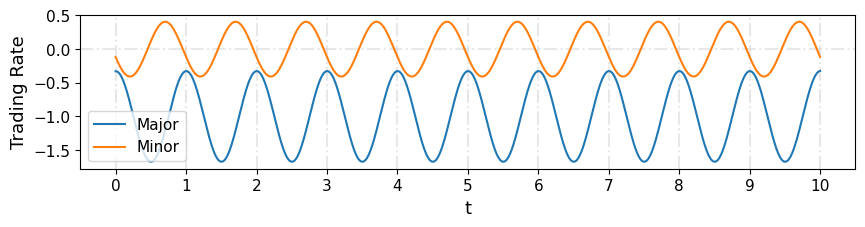

In [ ]:
# plt.figure()
# plt.plot(t_list,Q0_period,label='Major')
# plt.plot(t_list,Q_period,label='Minor')
# plt.legend()
# plt.xlabel('t')
# plt.ylabel('Inventory')
# # plt.savefig(os.path.join(fig_path,'inventory_period_twap.jpg'))
# plt.show()

plt.figure(figsize=(10,2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1],v0_period,label='Major')
plt.plot(t_list[:-1],v_period,label='Minor')
plt.legend()
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_period_cos.jpg'))
plt.show()

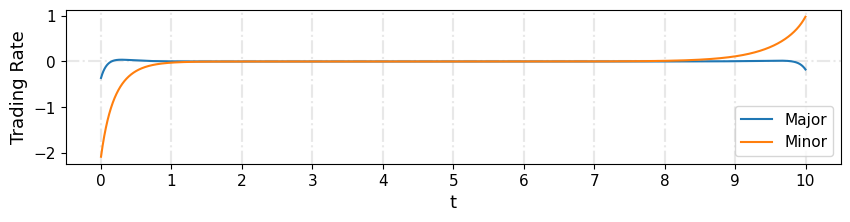

In [ ]:
plt.figure(figsize=(10,2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1],v0_trend,label='Major')
plt.plot(t_list[:-1],v_trend,label='Minor')
plt.legend()
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_trend_cos.jpg'))
plt.show()

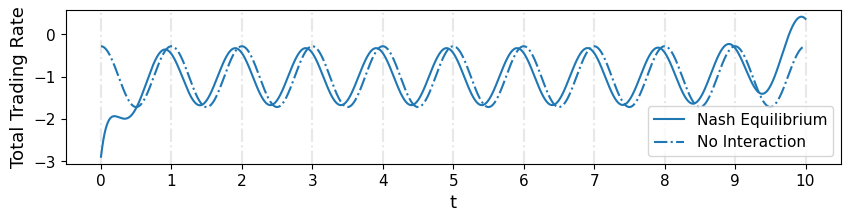

In [ ]:
v_total = v0 + v
v_total_nogame = v0_nogame + v_nogame

plt.figure(figsize=(10,2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1], v_total,label='Nash Equilibrium')
plt.plot(t_list[:-1], v_total_nogame,label='No Interaction',color='tab:blue',linestyle='-.')
plt.legend()
plt.xlabel('t')
plt.ylabel('Total Trading Rate')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'total_trading_rate_cos.jpg'))
plt.show()

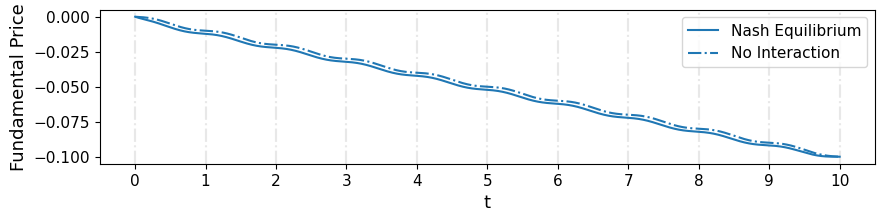

In [ ]:
price = lamb0 * (Q0 - Q0[0]) + lamb * (Q - Q[0])
price_nogame = lamb0 * (Q0_nogame - Q0_nogame[0]) + lamb * (Q_nogame - Q_nogame[0])

plt.figure(figsize=(10,2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list,price,label='Nash Equilibrium')
plt.plot(t_list,price_nogame,label='No Interaction',color='tab:blue',linestyle='-.')
plt.legend()
plt.xlabel('t')
plt.ylabel('Fundamental Price')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'fundamental_price_cos.jpg'))
plt.show()

In [ ]:
v_total_period = v0_period + v_period
v_total_nogame_period = v0_nogame
A_v_total = 0.5 * (max(v_total_period) - min(v_total_period))
A_v_total_nogame = 0.5 * (max(v_total_nogame_period) - min(v_total_nogame_period))
A_v_total, A_v_total_nogame

(0.6723407253189789, 0.7169527506212248)

(0.0010203904490841726, 0.0011410732501678123)

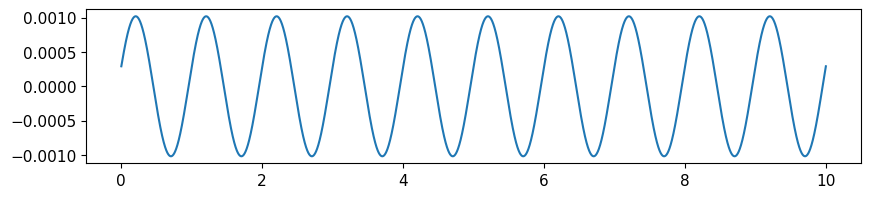

In [ ]:
price_period = lamb0 * Q0_period + lamb * Q_period
price_nogame_period = lamb0 * (Q0_nogame - q0 * (1 - t_list/T))

plt.plot(t_list,price_period)
A_price = 0.5 * (max(price_period) - min(price_period))
A_price_nogame = 0.5 * (max(price_nogame_period) - min(price_nogame_period))
A_price, A_price_nogame

# TWAP

In [ ]:
def R_TWAP(t,q=q0,n=10):
    k = np.floor(t)+1
    return q * (2 * n - 2 * k + 1)/(2 * n)

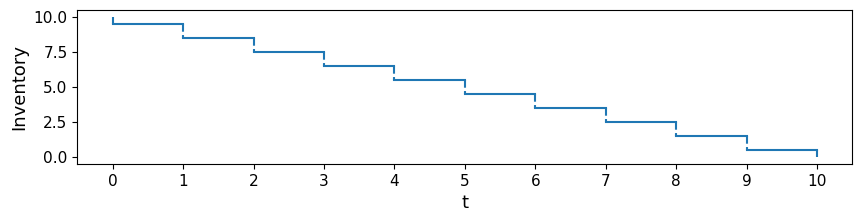

In [ ]:
for i in range(10):
    plt.plot([i,i+1], [(20 - 2*i - 1) * q0/20, (20 - 2*i - 1) * q0/20],color='tab:blue')
plt.plot([0,0],[q0, 19*q0/20],linestyle='--',color='tab:blue')
for i in range(1,10):
    plt.plot([i,i],[(20 - 2*i + 1) * q0/20, (20 - 2*i - 1) * q0/20],linestyle='--',color='tab:blue')
plt.plot([10,10],[q0/20, 0],linestyle='--',color='tab:blue')
plt.xlabel('t')
plt.ylabel('Inventory')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'targeting_strategy_twap.jpg'))
plt.show()

In [ ]:
Q0, Q = major_minor_MFG(R=R_TWAP, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

In [ ]:
Q0_nogame, _ = major_minor_MFG(R=R_TWAP, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=0)
_, Q_nogame = major_minor_MFG(R=R_TWAP, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=0, lamb=lamb)

In [ ]:
v0 = (Q0[1:]-Q0[:-1])/ h
v0_nogame = (Q0_nogame[1:]-Q0_nogame[:-1])/ h
v = (Q[1:]-Q[:-1])/ h
v_nogame = (Q_nogame[1:]-Q_nogame[:-1])/ h

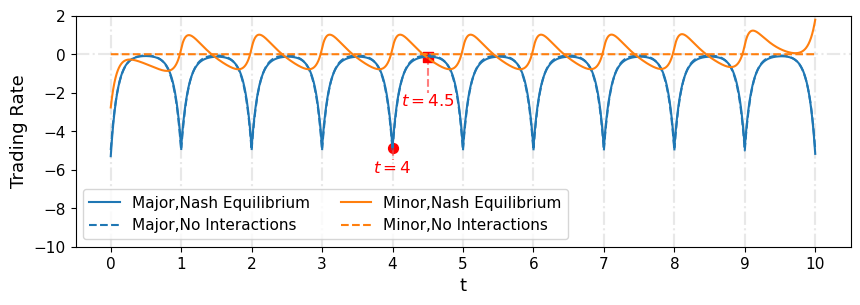

In [ ]:
t_mark_1 = 4 - h
t_mark_2 = 4.5 - h
plt.figure(figsize=(10,3))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1],v0,label='Major,Nash Equilibrium')
plt.plot(t_list[:-1],v0_nogame,color='tab:blue',linestyle='--',label='Major,No Interactions')
plt.plot(t_list[:-1],v,label='Minor,Nash Equilibrium')
plt.plot(t_list[:-1],v_nogame,color='tab:orange',linestyle='--',label='Minor,No Interactions')
plt.scatter([t_mark_1], [v0[int(t_mark_1/h)]], color='red', s=50)
plt.scatter([t_mark_2], [v0[int(t_mark_2/h)]], marker='s', color='red', s=50)
plt.vlines(x=t_mark_1,ymin=v0[int(t_mark_1/h)],ymax=-5.5,color='red',linestyle='--',alpha=0.5)
plt.vlines(x=t_mark_2,ymin=v0[int(t_mark_2/h)],ymax=-2,color='red',linestyle='--',alpha=0.5)
plt.text(4, -5.5, r'$t=4$', fontsize=12, color='red',ha='center',va='top')
plt.text(4.5, -2, r'$t=4.5$', fontsize=12, color='red',ha='center',va='top')

plt.ylim((-10,2))
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.legend(ncol=2)
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_twap.jpg'))
plt.show()

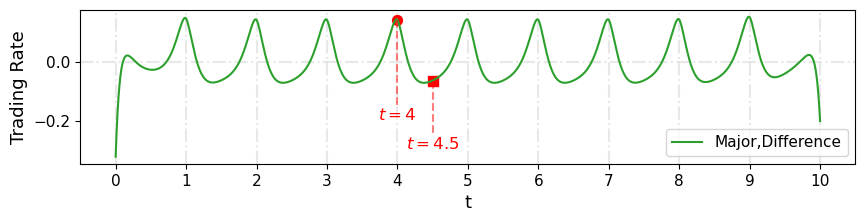

In [ ]:
v0_diff = v0 - v0_nogame
fig, ax1 = plt.subplots(figsize=(10, 2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
ax1.plot(t_list[:-1], v0_diff, label='Major,Difference',color='tab:green')
plt.scatter([t_mark_1], [v0_diff[int(t_mark_1/h)]], color='red', s=50)
plt.scatter([t_mark_2], [v0_diff[int(t_mark_2/h)]], marker='s', color='red', s=50)
ax1.set_xlabel('t')
ax1.set_ylabel('Trading Rate')

plt.vlines(x=t_mark_1,ymin=v0_diff[int(t_mark_1/h)],ymax=-0.15,color='red',linestyle='--',alpha=0.5)
plt.vlines(x=t_mark_2,ymin=v0_diff[int(t_mark_2/h)],ymax=-0.25,color='red',linestyle='--',alpha=0.5)
plt.text(4, -0.15, r'$t=4$', fontsize=12, color='red',ha='center',va='top')
plt.text(4.5, -0.25, r'$t=4.5$', fontsize=12, color='red',ha='center',va='top')

plt.legend()
plt.xticks(np.arange(T+1))
plt.legend()
plt.savefig(os.path.join(fig_path,'trading_rate_diff_twap.jpg'))
plt.show()

In [ ]:
major_cost_mean, major_cost_mean_Q0, major_cost_mean_R, major_cost_risk, major_cost_total = \
                    cal_major_cost(Q0=Q0, Q=Q, v0=v0, v=v, 
                    R=R_TWAP, q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

major_cost_mean_nogame, major_cost_mean_Q0_nogame, major_cost_mean_R_nogame, major_cost_risk_nogame, major_cost_total_nogame = \
                    cal_major_cost(Q0=Q0_nogame, Q=Q_nogame, v0=v0_nogame, v=v_nogame, 
                    R=R_TWAP, q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

minor_cost_mean,  minor_cost_risk, minor_cost_total = \
                    cal_minor_cost(Q0=Q0, Q=Q, v0=v0, v=v, 
                    q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

minor_cost_mean_nogame, minor_cost_risk_nogame, minor_cost_total_nogame = \
                    cal_minor_cost(Q0=Q0_nogame, Q=Q_nogame, v0=v0_nogame, v=v_nogame, 
                    q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

cost_analysis_twap = pd.DataFrame(
    {'major': [major_cost_mean, major_cost_mean_Q0, major_cost_mean_R, major_cost_risk, major_cost_total],
    'major_nogame': [major_cost_mean_nogame, major_cost_mean_Q0_nogame, major_cost_mean_R_nogame, major_cost_risk_nogame, major_cost_total_nogame],
    'minor': [minor_cost_mean, minor_cost_mean, 0, minor_cost_risk, minor_cost_total],
    'minor_nogame': [minor_cost_mean_nogame,minor_cost_mean_nogame, 0, minor_cost_risk_nogame, minor_cost_total_nogame]})
cost_analysis_twap.index = ['mean','mean_Q', 'mean_R','risk','total']
cost_analysis_twap.to_csv('cost_analysis_twap.csv')
cost_analysis_twap.round(5)

,major,major_nogame,minor,minor_nogame
mean,0.02138,0.02503,-0.04914,0.0
mean_Q,0.05036,0.02503,-0.04914,0.0
mean_R,0.02898,-0.00000,0.00000,0.0
risk,0.02642,0.02498,0.02253,0.0
total,0.04771,0.04998,-0.02662,0.0


In [ ]:
Q0_period, Q_period, Q0_trend, Q_trend = major_minor_MFG_decomposition(R=R_TWAP, q0=q0, q=q, T=T, h=h, 
                                                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

In [ ]:
v0_period = (Q0_period[1:] - Q0_period[:-1])/ h  - q0/T
v_period = (Q_period[1:] - Q_period[:-1])/ h
v0_trend = (Q0_trend[1:] - Q0_trend[:-1])/ h
v_trend = (Q_trend[1:] - Q_trend[:-1])/ h

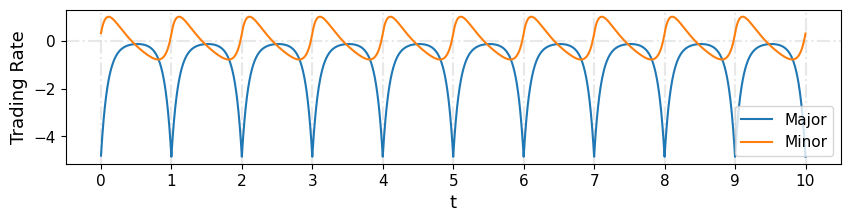

In [ ]:
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1],v0_period,label='Major')
plt.plot(t_list[:-1],v_period,label='Minor')
plt.legend()
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_period_twap.jpg'))
plt.show()

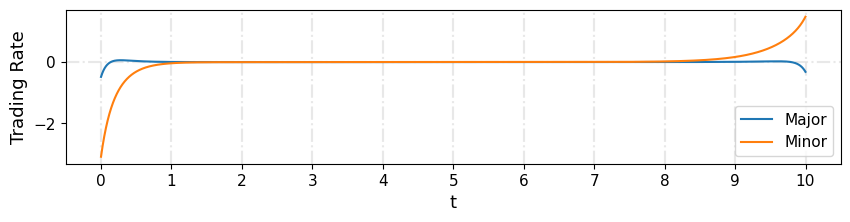

In [ ]:
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1],v0_trend,label='Major')
plt.plot(t_list[:-1],v_trend,label='Minor')
plt.legend()
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_trend_twap.jpg'))
plt.show()

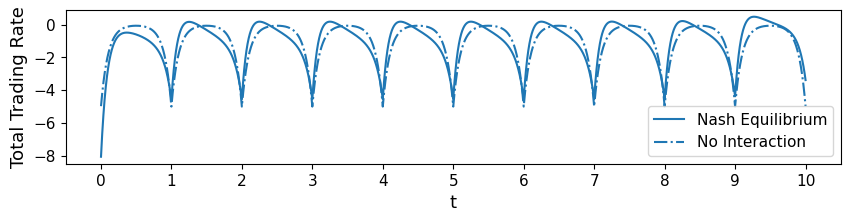

In [ ]:
v_total = v0 + v
v_total_nogame = v0_nogame + v_nogame

# plt.figure(figsize=(10,3))
plt.plot(t_list[:-1], v_total,label='Nash Equilibrium')
plt.plot(t_list[:-1], v_total_nogame,label='No Interaction',color='tab:blue',linestyle='-.')
plt.legend()
plt.xlabel('t')
plt.ylabel('Total Trading Rate')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'total_trading_rate_twap.jpg'))
plt.show()

In [ ]:
v_total_period = v0_period + v_period
v_total_nogame_period = v0_nogame
A_v_total = 0.5 * (max(v_total_period) - min(v_total_period))
A_v_total_nogame = 0.5 * (max(v_total_nogame_period) - min(v_total_nogame_period))
A_v_total, A_v_total_nogame

(2.3645506824269997, 2.466588604753822)

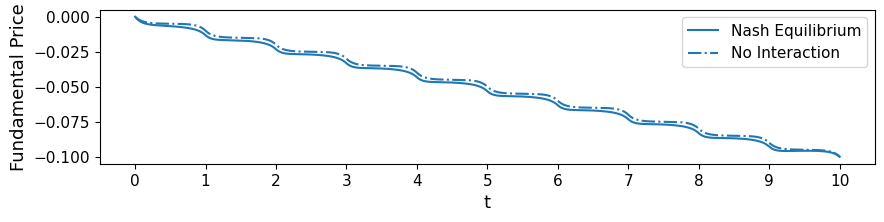

In [ ]:
price = lamb0 * (Q0 - Q0[0]) + lamb * (Q - Q[0])
price_nogame = lamb0 * (Q0_nogame - Q0_nogame[0]) + lamb * (Q_nogame - Q_nogame[0])

# plt.figure(figsize=(10,3))
plt.plot(t_list,price,label='Nash Equilibrium')
plt.plot(t_list,price_nogame,label='No Interaction',color='tab:blue',linestyle='-.')
plt.legend()
plt.xlabel('t')
plt.ylabel('Fundamental Price')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'fundamental_price_twap.jpg'))
plt.show()

In [ ]:
price_period = Q0_period + Q_period
price_nogame_period = Q0_nogame - q0 * (1 - t_list/T)

A_price = 0.5 * (max(price_period) - min(price_period))
A_price_nogame = 0.5 * (max(price_nogame_period) - min(price_nogame_period))
A_price, A_price_nogame

(0.23005640731846178, 0.23941443817242086)

# ``VWAP''

In [ ]:
def V(t):
    if t < 3:
        return 0.75 * math.cos(4*math.pi*t)
    else:
        return 0.5 * math.cos(2*math.pi*t)
    
def V_int(t):
    if t < 3:
        return 0.75 * math.sin(4*math.pi*t)/ (4*math.pi)
    else:
        return 0.5 * math.sin(2*math.pi*t)/ (2*math.pi)

In [ ]:
beta = - 0.5
alpha = (- q0 - T * beta) * 3 / ( (T-7)**3 - (-7)**3)
alpha, beta

(-0.04054054054054054, -0.5)

In [ ]:
def v_VWAP(t,alpha=alpha,beta=beta):
    return alpha*(t-7)**2 + beta + V(t)
def v_VWAP_trend(t,alpha=alpha,beta=beta):
    return alpha*(t-7)**2 + beta

def R_VWAP(t,alpha=alpha,beta=beta):
    return 10  + alpha * ((t-7)**3 - (-7)**3) / 3 + beta * t + V_int(t)

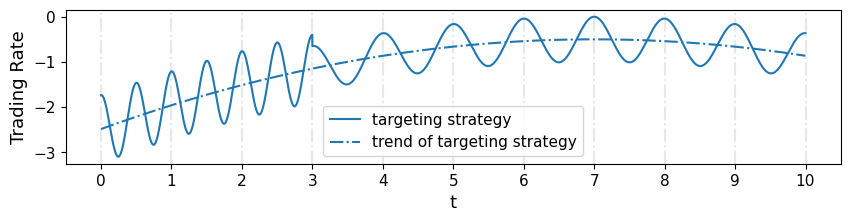

In [ ]:
# plt.plot(t_list,[R_VWAP(t) for t in t_list])
# plt.show()

# plt.figure(figsize=(10,3))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list, [v_VWAP(t) for t in t_list],color='tab:blue',label='targeting strategy')
plt.plot(t_list, [v_VWAP_trend(t) for t in t_list],color='tab:blue',linestyle='-.',label='trend of targeting strategy')
plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.xticks(np.arange(T+1))
plt.legend()
plt.savefig(os.path.join(fig_path,'targeting_strategy_vwap.jpg'))
plt.show()

In [ ]:
Q0, Q = major_minor_MFG(R=R_VWAP, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

In [ ]:
Q0_nogame, _ = major_minor_MFG(R=R_VWAP, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=0)
_, Q_nogame = major_minor_MFG(R=R_VWAP, q0=q0, q=q, T=T, h=h, 
                        phi0=phi0, a0=a0, phi=phi, a=a, lamb0=0, lamb=lamb)

In [ ]:
v0 = (Q0[1:]-Q0[:-1])/ h
v0_nogame = (Q0_nogame[1:]-Q0_nogame[:-1])/ h
v = (Q[1:]-Q[:-1])/ h
v_nogame = (Q_nogame[1:]-Q_nogame[:-1])/ h

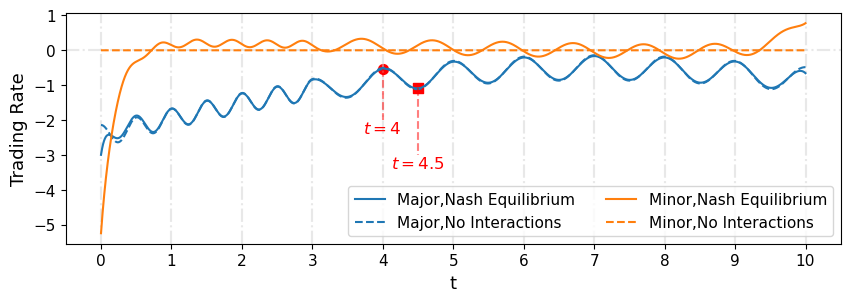

In [ ]:
t_mark_1 = 4 - h
t_mark_2 = 4.5 - h
plt.figure(figsize=(10,3))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1],v0,label='Major,Nash Equilibrium')
plt.plot(t_list[:-1],v0_nogame,color='tab:blue',linestyle='--',label='Major,No Interactions')
plt.plot(t_list[:-1],v,label='Minor,Nash Equilibrium')
plt.plot(t_list[:-1],v_nogame,color='tab:orange',linestyle='--',label='Minor,No Interactions')
plt.scatter([t_mark_1], [v0[int(t_mark_1/h)]], color='red', s=50)
plt.scatter([t_mark_2], [v0[int(t_mark_2/h)]], marker='s', color='red', s=50)
plt.vlines(x=t_mark_1,ymin=v0[int(t_mark_1/h)],ymax=-2,color='red',linestyle='--',alpha=0.5)
plt.vlines(x=t_mark_2,ymin=v0[int(t_mark_2/h)],ymax=-3,color='red',linestyle='--',alpha=0.5)
plt.text(4, -2, r'$t=4$', fontsize=12, color='red',ha='center',va='top')
plt.text(4.5, -3, r'$t=4.5$', fontsize=12, color='red',ha='center',va='top')

plt.xlabel('t')
plt.ylabel('Trading Rate')
plt.legend(ncol=2)
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_vwap.jpg'))
plt.show()

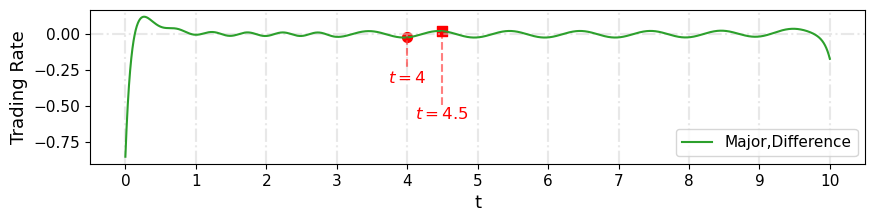

In [ ]:
v0_diff = v0 - v0_nogame
fig, ax1 = plt.subplots(figsize=(10, 2))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.axhline(0,color='lightgray',alpha=0.5,linestyle='-.')
ax1.plot(t_list[:-1], v0_diff, label='Major,Difference',color='tab:green')
plt.scatter([t_mark_1], [v0_diff[int(t_mark_1/h)]], color='red', s=50)
plt.scatter([t_mark_2], [v0_diff[int(t_mark_2/h)]], marker='s', color='red', s=50)
ax1.set_xlabel('t')
ax1.set_ylabel('Trading Rate')
plt.vlines(x=t_mark_1,ymin=v0_diff[int(t_mark_1/h)],ymax=-0.25,color='red',linestyle='--',alpha=0.5)
plt.vlines(x=t_mark_2,ymin=v0_diff[int(t_mark_2/h)],ymax=-0.5,color='red',linestyle='--',alpha=0.5)
plt.text(4, -0.25, r'$t=4$', fontsize=12, color='red',ha='center',va='top')
plt.text(4.5, -0.5, r'$t=4.5$', fontsize=12, color='red',ha='center',va='top')

plt.legend()
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'trading_rate_diff_vwap.jpg'))
plt.show()

In [ ]:
major_cost_mean, major_cost_mean_Q0, major_cost_mean_R, major_cost_risk, major_cost_total = \
                    cal_major_cost(Q0=Q0, Q=Q, v0=v0, v=v, 
                    R=R_VWAP, q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

major_cost_mean_nogame, major_cost_mean_Q0_nogame, major_cost_mean_R_nogame, major_cost_risk_nogame, major_cost_total_nogame = \
                    cal_major_cost(Q0=Q0_nogame, Q=Q_nogame, v0=v0_nogame, v=v_nogame, 
                    R=R_VWAP, q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

minor_cost_mean,  minor_cost_risk, minor_cost_total = \
                    cal_minor_cost(Q0=Q0, Q=Q, v0=v0, v=v, 
                    q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

minor_cost_mean_nogame, minor_cost_risk_nogame, minor_cost_total_nogame = \
                    cal_minor_cost(Q0=Q0_nogame, Q=Q_nogame, v0=v0_nogame, v=v_nogame, 
                    q0=q0, q=q, T=T, h=h, 
                    phi0=phi0, a0=a0, phi=phi, a=a, lamb0=lamb0, lamb=lamb)

cost_analysis_vwap = pd.DataFrame(
    {'major': [major_cost_mean, major_cost_mean_Q0, major_cost_mean_R, major_cost_risk, major_cost_total],
    'major_nogame': [major_cost_mean_nogame, major_cost_mean_Q0_nogame, major_cost_mean_R_nogame, major_cost_risk_nogame, major_cost_total_nogame],
    'minor': [minor_cost_mean, minor_cost_mean, 0, minor_cost_risk, minor_cost_total],
    'minor_nogame': [minor_cost_mean_nogame,minor_cost_mean_nogame, 0, minor_cost_risk_nogame, minor_cost_total_nogame]})
cost_analysis_vwap.index = ['mean','mean_Q', 'mean_R','risk','total']
cost_analysis_vwap.to_csv('cost_analysis_vwap.csv')
cost_analysis_vwap.round(5)

,major,major_nogame,minor,minor_nogame
mean,0.01324,0.01366,-0.05214,0.0
mean_Q,0.04119,0.01366,-0.05214,0.0
mean_R,0.02795,-0.00000,0.00000,0.0
risk,0.00054,0.00038,0.02455,0.0
total,0.01378,0.01404,-0.02759,0.0


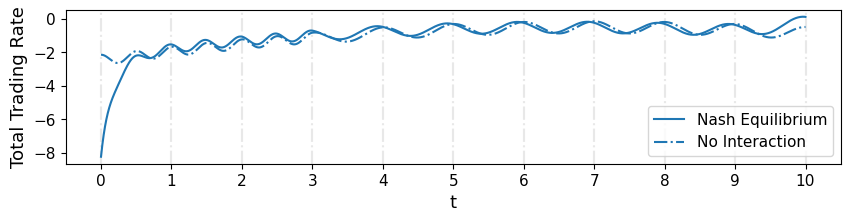

In [ ]:
v_total = v0 + v
v_total_nogame = v0_nogame + v_nogame

# fig, ax1 = plt.subplots(figsize=(10, 3))
for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list[:-1], v_total,label='Nash Equilibrium')
plt.plot(t_list[:-1], v_total_nogame,label='No Interaction',color='tab:blue',linestyle='-.')
plt.legend()
plt.xlabel('t')
plt.ylabel('Total Trading Rate')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'total_trading_rate_vwap.jpg'))
plt.show()

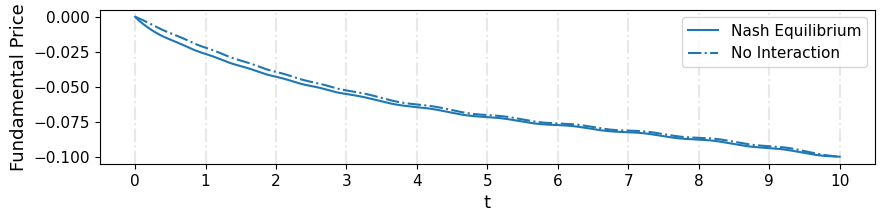

In [ ]:
price = lamb0 * (Q0 - Q0[0]) + lamb * (Q - Q[0])
price_nogame = lamb0 * (Q0_nogame - Q0_nogame[0]) + lamb * (Q_nogame - Q_nogame[0])

for i in range(T+1):
    plt.axvline(i,color='lightgray',alpha=0.5,linestyle='-.')
plt.plot(t_list,price,label='Nash Equilibrium')
plt.plot(t_list,price_nogame,label='No Interaction',color='tab:blue',linestyle='-.')
plt.legend()
plt.xlabel('t')
plt.ylabel('Fundamental Price')
plt.xticks(np.arange(T+1))
plt.savefig(os.path.join(fig_path,'fundamental_price_vwap.jpg'))
plt.show()

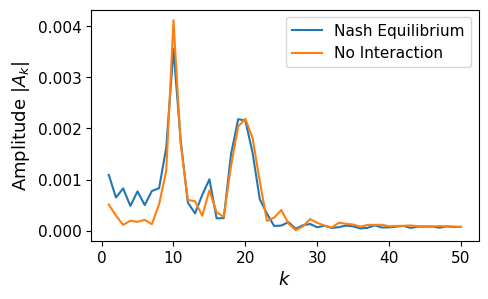

In [ ]:
analyzer = Analyzer(pd.Series(price))
analyzer.periodicity_analyzer(n=175,gamma_len=5000)
spec_price = analyzer.spec[:50+1]
analyzer = Analyzer(pd.Series(price_nogame))
analyzer.periodicity_analyzer(n=175,gamma_len=5000)
spec_price_nogame = analyzer.spec[:50+1]

plt.figure(figsize=(5,3))
freq_list = [i for i in range(len(spec_price))]
plt.plot(freq_list[1:], np.sqrt(spec_price)[1:],label='Nash Equilibrium')
plt.plot(freq_list[1:], np.sqrt(spec_price_nogame)[1:],label='No Interaction')
plt.xlabel("$k$")
plt.ylabel("Amplitude $|A_k|$")
plt.legend()
plt.savefig(os.path.join(fig_path,'fundamental_price_vwap_amplitude.jpg'))
plt.show()

In [ ]:
np.sqrt(spec_price)[20],np.sqrt(spec_price_nogame)[20]

(0.002153884707397476, 0.0021885109187150405)

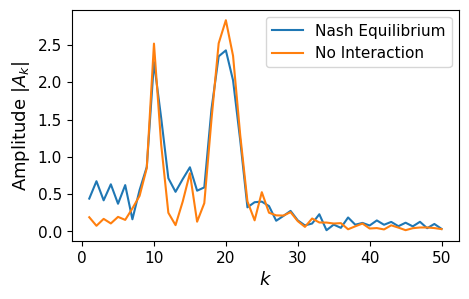

In [ ]:
analyzer = Analyzer(pd.Series(v_total))
analyzer.periodicity_analyzer(n=175,gamma_len=5000)
spec_v_total = analyzer.spec[:50+1]
analyzer = Analyzer(pd.Series(v_total_nogame))
analyzer.periodicity_analyzer(n=175,gamma_len=5000)
spec_v_total_nogame = analyzer.spec[:50+1]

plt.figure(figsize=(5,3))
# freq_list = [i/3 for i in range(len(spec_v_total))]
freq_list = [i for i in range(len(spec_v_total))]
plt.plot(freq_list[1:], np.sqrt(spec_v_total)[1:],label='Nash Equilibrium')
plt.plot(freq_list[1:], np.sqrt(spec_v_total_nogame)[1:],label='No Interaction')
plt.xlabel("$k$")
plt.ylabel("Amplitude $|A_k|$")
plt.legend()
plt.savefig(os.path.join(fig_path,'total_trading_rate_vwap_amplitude.jpg'))
plt.show()